### Looking for correlations in the data of the Movie Industry

In [136]:
# Importing the libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 

import matplotlib 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) 
#This adjusts the configuration of the plots we will create

In [149]:
# Reading the data

df = pd.read_csv('movies.csv')

In [150]:
# Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [151]:
#Looking if there is any missing data 

# Counting the null values by column
missing_values = df.isnull().sum()

print("Null values by column:")
print(missing_values)


Null values by column:
name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [152]:
# Displaying the % of data missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [153]:
# Because we are trying to find relations between certain values

df = df.dropna(subset=['budget','gross','rating','company','runtime'])

# In other cases, we would need to find the missing values checking the sources

In [154]:
# We can check the shape of our data now

df.shape

(5421, 15)

In [155]:
# Data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [156]:
# Changing the data type of some columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [ ]:
# We change the format for the release date:

df['released'] = df['released'].str.extract(r'^([^()]+)').iloc[:, 0].str.strip()
df['released'] = pd.to_datetime(df['released'], errors='coerce')


In [158]:
# We have release date and year. We're gonna pull the year from the released column

df['yearcorrect'] = df['released'].astype(str).str[:4]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [160]:
# We check the types again

df.dtypes

name                   object
rating                 object
genre                  object
year                    int64
released       datetime64[ns]
score                 float64
votes                 float64
director               object
writer                 object
star                   object
country                object
budget                  int64
gross                   int64
company                object
runtime               float64
yearcorrect            object
dtype: object

In [165]:
# We order de data by revenue

df = df.sort_values(by=['gross'], inplace=False, ascending=False)


In [96]:
# Dropping any duplicates looking at specific column

# df['Company'].drop_duplicates().sort_values(ascending=False)

# Dropping any duplicates in general

#df.drop_duplicates()



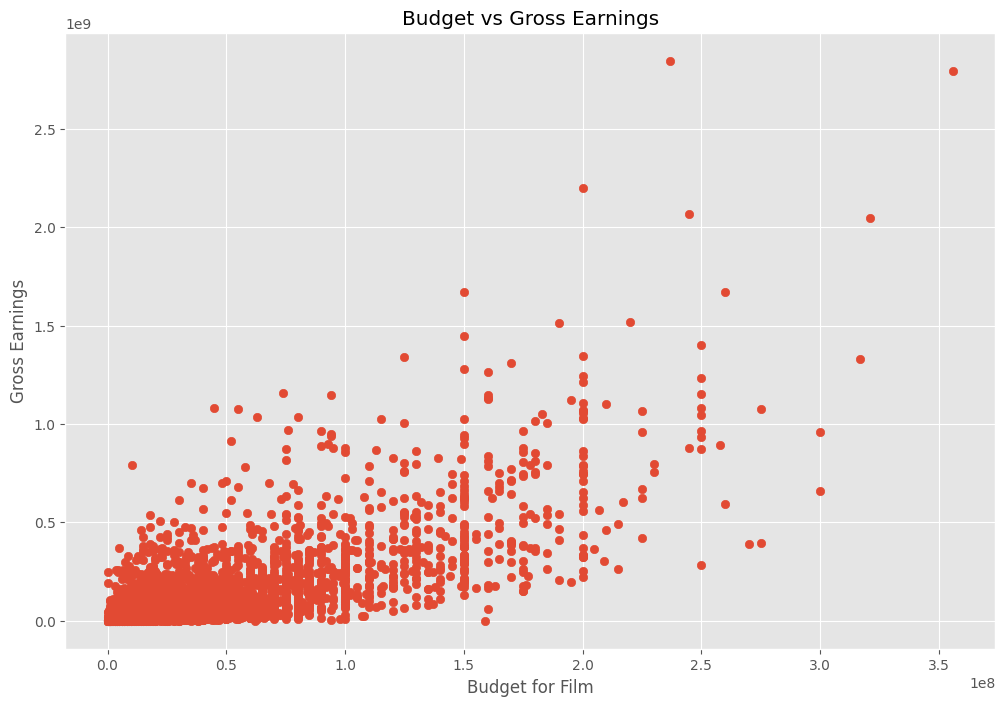

In [166]:
# We look at the correlation between the revenue (gross) and other features.

# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')

plt.ylabel('Gross Earnings')

plt.show()


<Axes: xlabel='budget', ylabel='gross'>

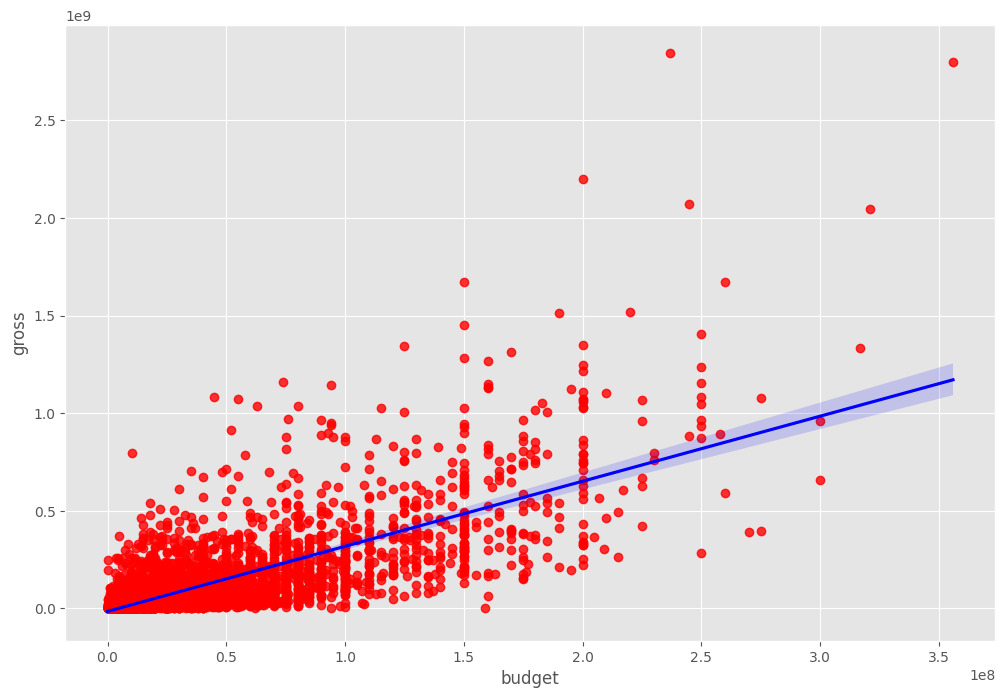

In [114]:
# Now using seaborn

sns.regplot(data = df, x='budget', y='gross', scatter_kws={"color": "red"}, line_kws={"color":"blue"})



In [167]:
# Looking at correlation, considering only numeric values

df.select_dtypes(include=['number']).corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


#### High correlation between budget and gross

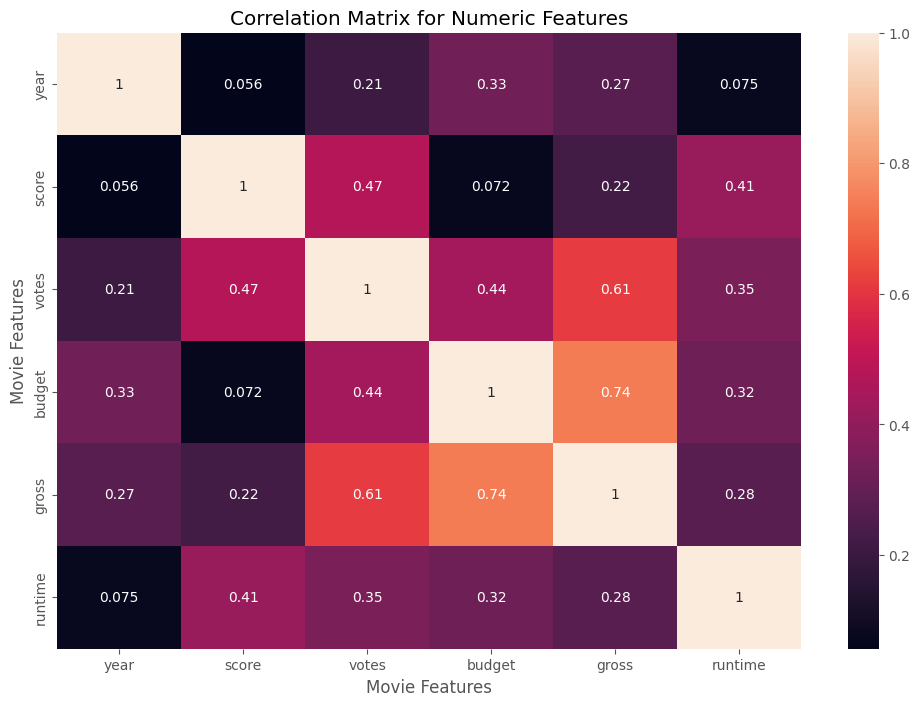

<function matplotlib.pyplot.show(close=None, block=None)>

In [168]:
# Now we plot the matrix as a heatmap

correlation_matrix = df.select_dtypes(include=['number']).corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

plt.show

In [169]:
# Looking at the company

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [170]:
# We look for a way to make the companies a numeric value to compare.

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,2009-12-18,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,2019,2019-04-26,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,1997,1997-12-19,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,2015,2015-12-18,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,2018,2018-04-27,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,38


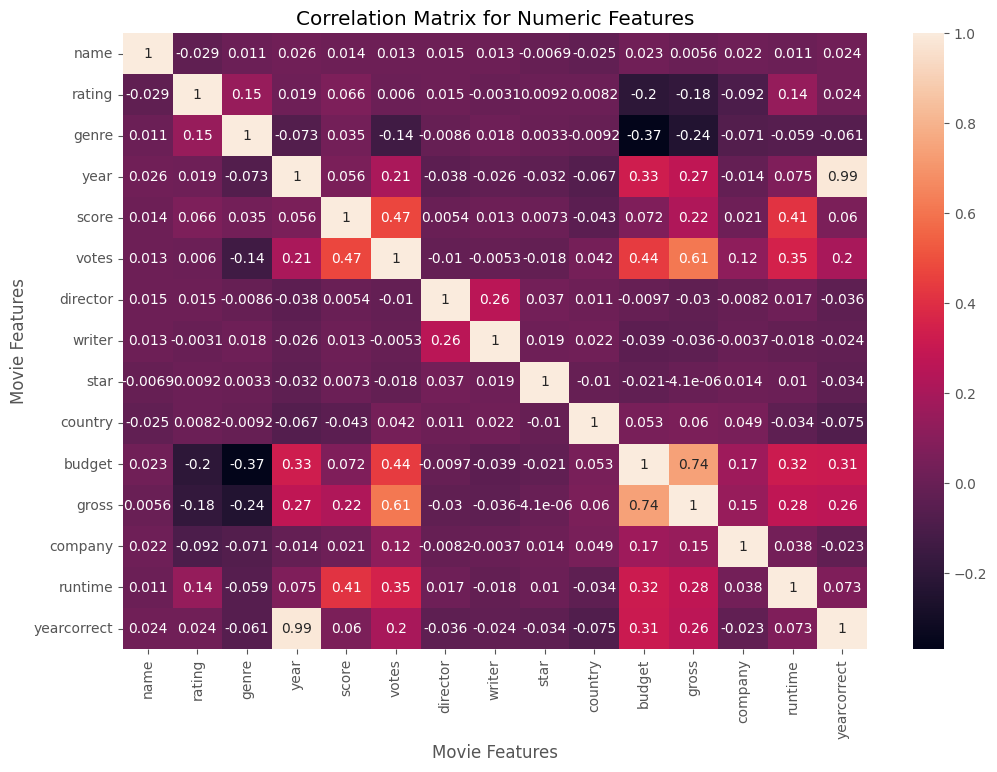

<function matplotlib.pyplot.show(close=None, block=None)>

In [171]:
correlation_matrix = df_numerized.select_dtypes(include=['number']).corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

plt.show

In [172]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,0.025227,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.024136
rating,-0.029234,1.000000,0.147796,0.019499,-0.006890,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.023929
genre,0.010996,0.147796,1.000000,-0.073167,-0.075551,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.061186
year,0.025542,0.019499,-0.073167,1.000000,0.581274,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.987770
released,0.025227,-0.006890,-0.075551,0.581274,1.000000,0.046496,0.134868,-0.017464,-0.010809,-0.003037,-0.031163,0.204595,0.168670,0.018567,0.056978,0.458127
score,0.014450,0.065983,0.035106,0.056386,0.046496,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.059718
votes,0.012615,0.006031,-0.135990,0.206021,0.134868,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.198517
director,0.015246,0.014656,-0.008553,-0.038354,-0.017464,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.036329
writer,0.012880,-0.003149,0.017578,-0.025908,-0.010809,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.024179
star,-0.006882,0.009196,0.003341,-0.032157,-0.003037,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.034355


In [173]:
# We 'unstack' 

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released       0.025227
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.024136
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released      -0.006890
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [174]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
rating       company       -0.092357
company      rating        -0.092357
released     genre         -0.075551
genre        released      -0.075551
yearcorrect  country       -0.074546
country      yearcorrect   -0.074546
year         genre         -0.073167
genre        year          -0.073167
company      genre         -0.071334
genre        company       -0.071334
year         country       -0.066748
country      year          -0.066748
yearcorrect  genre         -0.061186
genre        yearcorrect   -0.061186
             runtime       -0.059237
runtime      genre         -0.059237
country      score         -0.043051
s

In [175]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

year         released       0.581274
released     year           0.581274
gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.987770
yearcorrect  year           0.987770
director     director       1.000000
votes        votes          1.000000
released     released       1.000000
score        score          1.000000
rating       rating         1.000000
name         name           1.000000
genre        genre          1.000000
year         year           1.000000
budget       budget         1.000000
country      country        1.000000
writer       writer         1.000000
star         star           1.000000
company      company        1.000000
gross        gross          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

### Votes and Budget have the highest correlation to gross earnings!